# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
# Create the city DataFrames.

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#  1a. Get the total rides for each city type

urban_ride_count = urban_cities_df.groupby(["type"]).count()["ride_id"].sum()
suburban_ride_count = suburban_cities_df.groupby(["type"]).count()["ride_id"].sum()
rural_ride_count = rural_cities_df.groupby(["type"]).count()["ride_id"].sum()

In [5]:
# 1b. Convert total rides by city to dict

total_rides_dict = {"Rural": rural_ride_count, "Suburban": suburban_ride_count, "Urban": urban_ride_count}
# total_rides_dict

In [6]:
# 2a. Get the total drivers for each city type

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"].sum()
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"].sum()
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"].sum()

In [7]:
# 2b. Convert total drivers by city to dict

total_drivers_dict = {"Urban": urban_driver_count, "Suburban": suburban_driver_count, "Rural": rural_driver_count}
# total_drivers_dict

In [8]:
#  3a. Get the total amount of fares for each city type

total_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
# total_fares_by_type

In [9]:
# 3b. Convert total fares by city to dict

total_fares_dict = {"Urban": total_fares_by_type["Urban"], "Suburban": total_fares_by_type["Suburban"], "Rural": total_fares_by_type["Rural"]}
# total_fares_dict

In [10]:
# 4. Get the average fare for each ride for each city type.

fares_per_ride_dict = {key : float(total_fares_dict[key] / total_rides_dict[key]) for key in total_fares_dict.keys()}
# fares_per_ride_dict

In [11]:
# 5. Get the average fare per driver for each city type. 

fares_per_driver_dict = {key : float(total_fares_dict[key] / total_drivers_dict[key]) for key in total_fares_dict.keys()}
# fares_per_driver_dict

In [12]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides_dict,
    "Total Drivers": total_drivers_dict,
    "Total Fares": total_fares_dict,
    "Average Fare per Ride": fares_per_ride_dict,
    "Average Fare per Driver": fares_per_driver_dict})

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
# Not needed as my summary did not have an index name.

# pyber_summary_df.index.name = None

In [14]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [23]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_date = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
fares_by_date.head(15)

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
       2019-01-08 06:19:45    19.39
       2019-01-09 15:30:35    31.84
       2019-01-11 04:39:27    16.42
       2019-01-14 07:09:17    18.05
       2019-01-14 15:58:48    54.10
       2019-01-15 21:44:26    30.26
       2019-01-18 00:46:28    15.12
       2019-01-18 07:36:46    43.57
       2019-01-19 11:40:46    49.44
       2019-01-19 12:38:07    38.68
Name: fare, dtype: float64

In [25]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

fares_by_date = fares_by_date.reset_index()
fares_by_date.head()


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [46]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

fares_date_pivot = pd.pivot_table(
data = pyber_data_df,
index = 'date',
values = 'fare',
columns = 'type',
aggfunc = 'sum'
)
fares_date_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [59]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_through_apr_fares_df = fares_date_pivot.loc[(fares_date_pivot.index > '2019-01-01') & (fares_date_pivot.index <= '2019-04-29'), :]
jan_through_apr_fares_df.tail()                                                                                        

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [60]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

jan_through_apr_fares_df.index = pd.to_datetime(jan_through_apr_fares_df.index)

In [61]:
# 7. Check that the datatype for the index is datetime using df.info()

jan_through_apr_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [62]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fares_by_month = jan_through_apr_fares_df.resample("W").sum()
fares_by_month.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


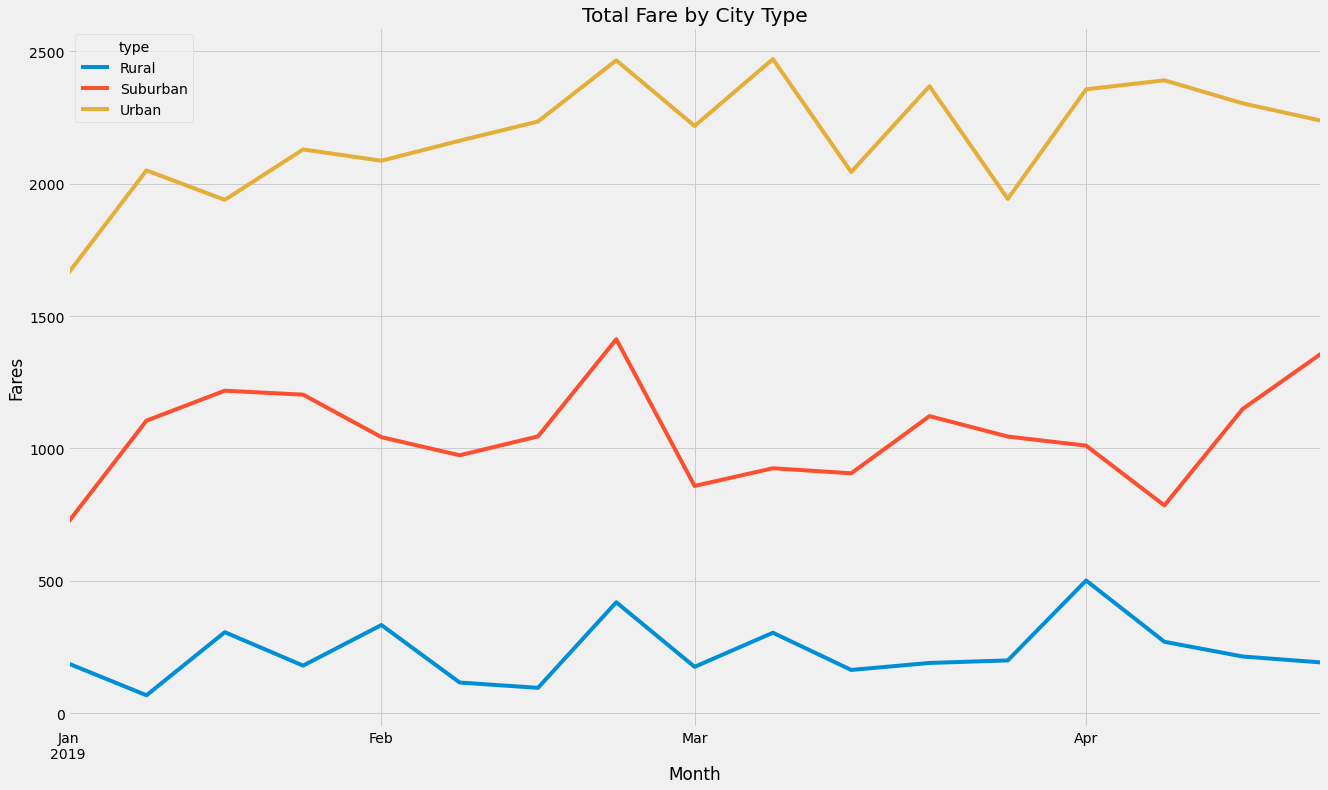

<Figure size 432x288 with 0 Axes>

In [79]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
fares_by_week_plot = fares_by_month.plot(figsize = (20,12))
fares_by_week_plot.set_title("Total Fare by City Type")
fares_by_week_plot.set_xlabel ("Month")
fares_by_week_plot.set_ylabel ("Fares")
style.use('fivethirtyeight')

plt.savefig("Images/Total_Fare_by_City.png")

plt.show()
plt.tight_layout()


